<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9D%91%EA%B8%89%EC%8B%A4_%EB%82%B4%EC%9B%90%EC%8B%9C%EA%B0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2020 ~ 2021년은 연령별 남녀 구분 없음

In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,998 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
df_arrive = pd.read_csv('/content/drive/MyDrive/BigData/응급실+내원시간+현황_20241106194832.csv')
df_arrive.head()

# 전체적으로 불필요 컬럼 삭제
df_arrive.drop('연령별(1)',axis=1,inplace=True)
df_arrive

# 필요 데이터만 추출 및 제거
df = df_arrive.iloc[2:3,:]
df = df.drop(['연령별(2)','성별(1)','2014','2015','2016','2017','2018','2019','2020','2021'],axis=1)
df

,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2015.1,2015.2,...,2020.7,2020.8,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
2,128496,79972,100393,213575,208524,217882,232854,227080,122959,76737,...,172852,162117,95864,61559,88988,178752,168111,168296,177792,168464


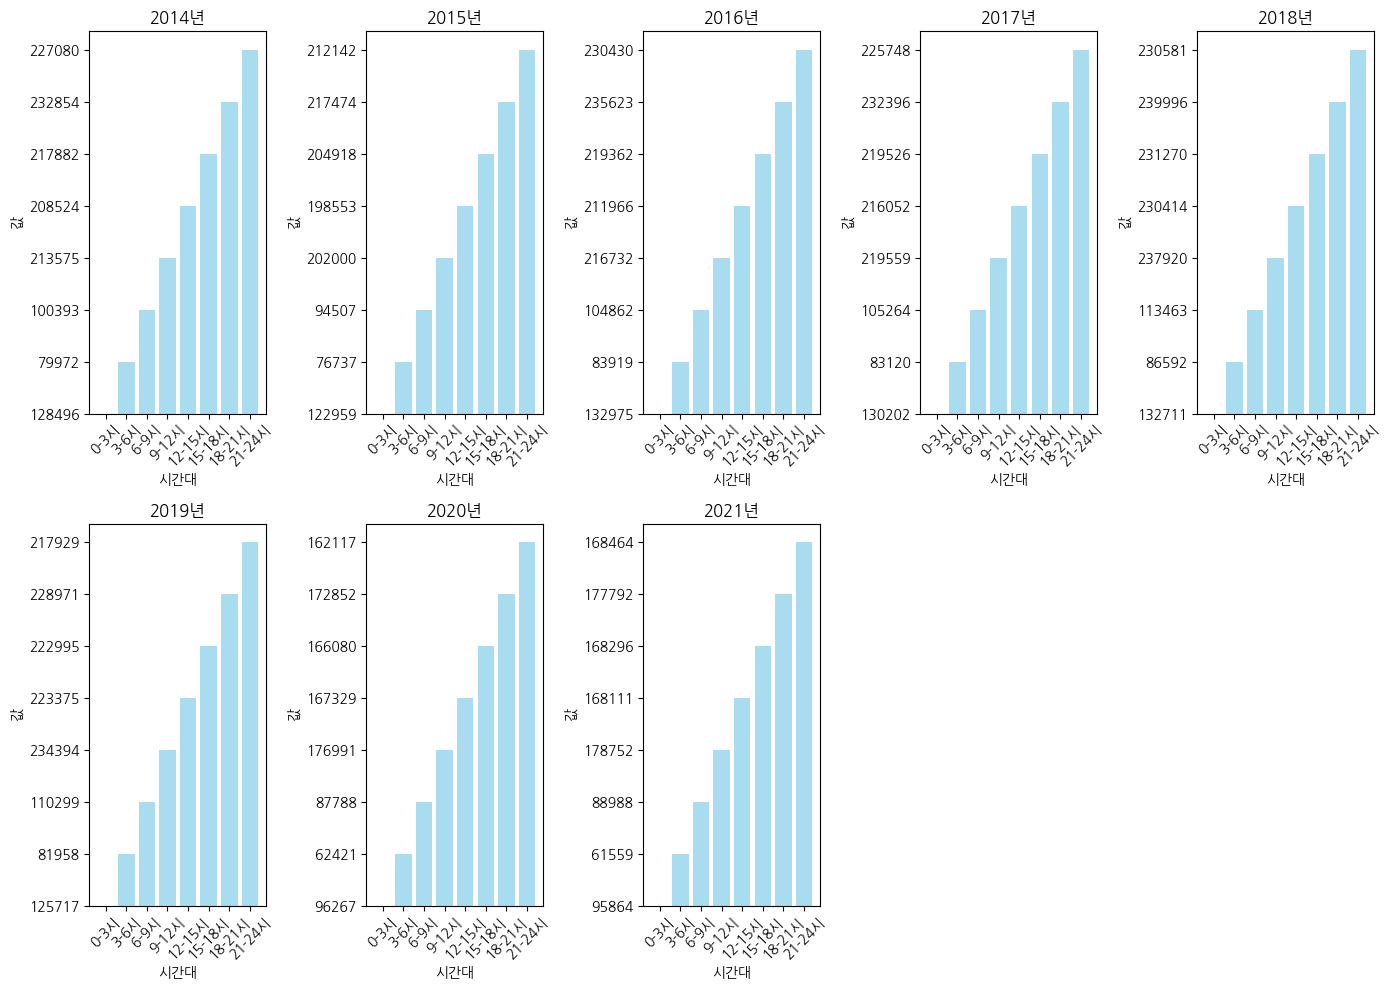

In [ ]:
# 시각화

# 시각화 편리하게 하기 위해 df 수정
df_see = df.transpose()  # 전치
df_see = df_see.reset_index()  # 인덱스 초기화
df_see = df_see.rename(columns={'index':'도착시간',2:'이용량'})  # 컬럼명 변경
df_see

# 시각화
df_see["연도"] = df_see["도착시간"].str.split(".").str[0]
df_see["시간대"] = df_see["도착시간"].str.split('.').str[1]
df_see = df_see.drop(columns=["도착시간"])
x_labels = ['0-3시', '3-6시', '6-9시', '9-12시', '12-15시', '15-18시','18-21시','21-24시']
# 연도별 그룹화
grouped = df_see.groupby("연도")

# 그래프 생성
plt.figure(figsize=(14, 10))

x_labels = ['0-3시', '3-6시', '6-9시', '9-12시', '12-15시', '15-18시', '18-21시', '21-24시']

# 각 연도별 시각화
for i, (year, group) in enumerate(grouped):
    # 시간대를 x_labels 인덱스에 매핑
    group = group.set_index("시간대").reindex([str(i + 1) for i in range(len(x_labels))], fill_value=0)

    # 각 연도의 서브플롯
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.subplot(2, len(grouped) // 2 + 1, i + 1)
    plt.bar(x_labels, group['이용량'], color='skyblue', alpha=0.7)
    plt.title(f"{year}년", fontsize=12)
    plt.xlabel("시간대", fontsize=10)
    plt.ylabel("값", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
